In [2]:
# Dependencies
import openweathermapy as owm
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from citipy import citipy
# import api_key from config file
from config import api_key

In [27]:
# Generate random latitudes and longitudes
latitudes=np.random.randint(low=-90000, high=90000, size=1500)
longitudes=np.random.randint(low=-180000, high=180000, size=1500)
latitudes=latitudes/1000
longitudes=longitudes/1000
# Assign a city for each randomly generated pair of coordinates
cities=[]
for n in range(len(latitudes)-1):
    city = citipy.nearest_city(latitude=latitudes[n],longitude=longitudes[n])
    cities.append(city.city_name)

In [28]:
# Drop repeated cities and sort cities list
cities=np.unique(cities)
len(cities)

606

In [29]:
#Create empty list in order to store requested variables
temp_data=[]
wind_data=[]
humidity_data=[]
cloud_data=[]
lat_data=[]
lon_data=[]
settings={
    "units":"imperial",
    "appid":api_key
}
n=0
valid_cities=0
for city in cities:
    n+=1
    if valid_cities==500: break
    try:
        current_weather=owm.get_current(city,**settings)
        temp_data.append(current_weather['main']['temp'])
        wind_data.append(current_weather['wind']['speed'])
        humidity_data.append(current_weather['main']['humidity'])
        cloud_data.append(current_weather['clouds']['all'])
        lat_data.append(current_weather['coord']['lat'])
        lon_data.append(current_weather['coord']['lon'])
        print(f"#{n}:{city} data collected")
        valid_cities+=1
    except:
        print(f"#{n}:{city} not found")
        temp_data.append(np.nan)
        wind_data.append(np.nan)
        humidity_data.append(np.nan)
        cloud_data.append(np.nan)    
        lat_data.append(np.nan)    
        lon_data.append(np.nan)

#1:aban not found
#2:abapo data collected
#3:aberfeldy data collected
#4:abilene data collected
#5:abong mbang data collected
#6:abonnema data collected
#7:abu dhabi data collected
#8:adrar data collected
#9:ahipara data collected
#10:ahome data collected
#11:airai data collected
#12:aklavik data collected
#13:akyab not found
#14:albany data collected
#15:albertville data collected
#16:alice springs data collected
#17:alihe data collected
#18:almaznyy data collected
#19:along data collected
#20:alotau not found
#21:alyangula data collected
#22:ambulu data collected
#23:amderma not found
#24:anadyr data collected
#25:ancud data collected
#26:antofagasta data collected
#27:anzio data collected
#28:apiai data collected
#29:aquiraz data collected
#30:araouane data collected
#31:arecibo data collected
#32:argayash data collected
#33:aripuana data collected
#34:arlit data collected
#35:arman data collected
#36:arraial do cabo data collected
#37:astana data collected
#38:atar data collected
#

#294:los llanos de aridane data collected
#295:luba data collected
#296:lubango data collected
#297:lubuk pakam data collected
#298:luderitz data collected
#299:luorong data collected
#300:maceio data collected
#301:madras data collected
#302:magistralnyy data collected
#303:mahebourg data collected
#304:mahendragarh data collected
#305:mahibadhoo data collected
#306:mahon data collected
#307:maloshuyka not found
#308:mandalgovi data collected
#309:manggar data collected
#310:manoel urbano data collected
#311:manono data collected
#312:manta data collected
#313:mar del plata data collected
#314:maragogi data collected
#315:marawi data collected
#316:marcona not found
#317:mareeba data collected
#318:margate data collected
#319:marolambo data collected
#320:marsh harbour data collected
#321:marshall data collected
#322:martapura data collected
#323:marv dasht not found
#324:maryborough data collected
#325:marystown data collected
#326:matara data collected
#327:mataura data collected
#3

In [37]:
cities_index=cities[0:n-1]
cities_index

array(['aban', 'abapo', 'aberfeldy', 'abilene', 'abong mbang', 'abonnema',
       'abu dhabi', 'adrar', 'ahipara', 'ahome', 'airai', 'aklavik',
       'akyab', 'albany', 'albertville', 'alice springs', 'alihe',
       'almaznyy', 'along', 'alotau', 'alyangula', 'ambulu', 'amderma',
       'anadyr', 'ancud', 'antofagasta', 'anzio', 'apiai', 'aquiraz',
       'araouane', 'arecibo', 'argayash', 'aripuana', 'arlit', 'arman',
       'arraial do cabo', 'astana', 'atar', 'atbasar', 'attawapiskat',
       'atuona', 'avarua', 'aykhal', 'ayorou', 'ayr', 'bagdarin',
       'bahia de caraquez', 'balakhta', 'ballina', 'bambous virieux',
       'bandar', 'bandarbeyla', 'banes', 'baoqing', 'barbar',
       'barentsburg', 'barrow', 'baruun-urt', 'batagay-alyta', 'batan',
       'batemans bay', 'bathsheba', 'baykit', 'beira', 'belgrade',
       'belmonte', 'beloha', 'belushya guba', 'bengkulu', 'bentiu',
       'beringovskiy', 'berlevag', 'betanzos', 'bethel', 'bethlehem',
       'beyneu', 'bihariganj'

In [60]:
# Create data frame with results
data={
    "Temperature (F)":temp_data,
    "Wind Speed (mph)":wind_data,
    "Humidity":humidity_data,
    "Cloudiness":cloud_data,
    "Latitude":lat_data,
    "Longitude":lon_data
}
weather_df=pd.DataFrame(data,index=cities[0:n-1])
weather_df=weather_df.dropna(how='any')
weather_df.to_csv('WeatherPy results.csv')
weather_df.head()

,Temperature (F),Wind Speed (mph),Humidity,Cloudiness,Latitude,Longitude
abapo,63.91,2.10,69.0,97.0,-18.83,-63.47
aberfeldy,49.84,13.87,87.0,40.0,56.62,-3.87
abilene,58.39,4.70,42.0,1.0,32.45,-99.73
abong mbang,67.13,1.72,99.0,100.0,3.98,13.18
abonnema,73.40,3.89,100.0,75.0,4.71,6.79


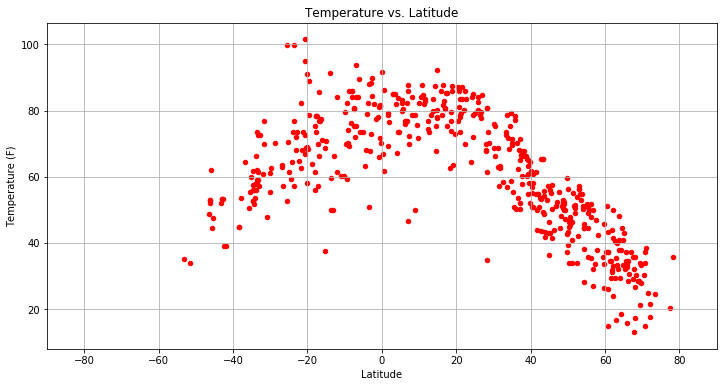

In [49]:
# Scatter plot temperature vs. latitude
weather_df.plot.scatter(
    x="Latitude",
    y="Temperature (F)",
    c='Red',
    figsize=(12,6),
    xlim=(-90,90),
    ylim=(min(weather_df['Temperature (F)'])-5,max(weather_df['Temperature (F)'])+5),
    title='Temperature vs. Latitude',
    grid=True
)
# Save the Figure
plt.savefig('Temperature vs Latitude.png')
# Show the Figure
plt.show()

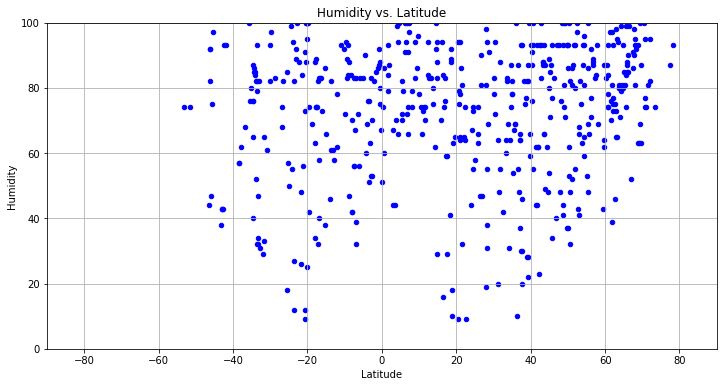

In [50]:
# Scatter plot humidity vs. latitude
weather_df.plot.scatter(
    x="Latitude",
    y="Humidity",
    c='Blue',
    figsize=(12,6),
    xlim=(-90,90),
    ylim=(0,100),
    title='Humidity vs. Latitude',
    grid=True
)
# Save the Figure
plt.savefig('Humidity vs Latitude.png')
# Show the Figure
plt.show()

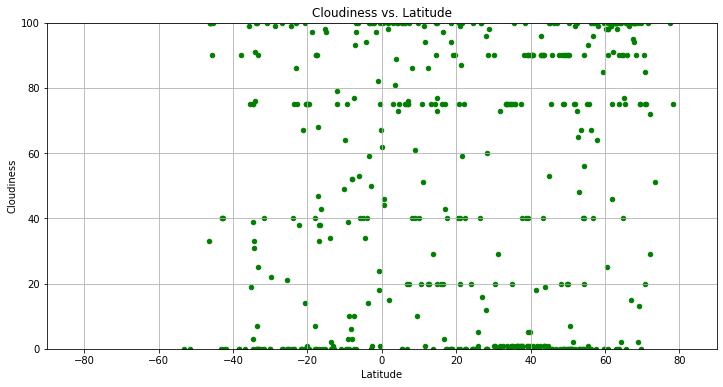

In [55]:
# Scatter plot cloudiness vs. latitude
weather_df.plot.scatter(
    x="Latitude",
    y="Cloudiness",
    c='Green',
    figsize=(12,6),
    xlim=(-90,90),
    ylim=(0,100),
    title='Cloudiness vs. Latitude',
    grid=True
)
# Save the Figure
plt.savefig('Cloudiness vs Latitude.png')
# Show the Figure
plt.show()

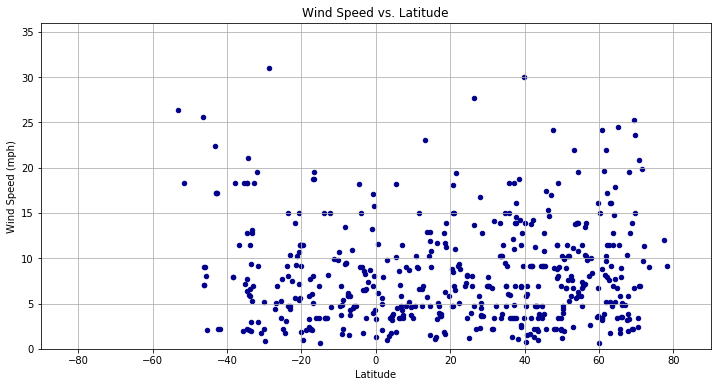

In [57]:
# Scatter wind speed vs. latitude
weather_df.plot.scatter(
    x="Latitude",
    y="Wind Speed (mph)",
    c='DarkBlue',
    figsize=(12,6),
    xlim=(-90,90),
    ylim=(0,max(weather_df['Wind Speed (mph)'])+5),
    title='Wind Speed vs. Latitude',
    grid=True
)
# Save the Figure
plt.savefig('Wind Speed vs Latitude.png')
# Show the Figure
plt.show()